# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#https://tec.bootcampcontent.com/Tecnologico-de-Monterrey-Coding-Boot-Camp/TDM-REV-DATA-PT-01-2020-U-C/tree/master/02-Homework/06-Python-APIs/Instructions
#https://developers.google.com/maps/documentation/javascript/places#place_search_fields
#https://console.cloud.google.com/billing/011473-5E27ED-A9E28B/payment?project=molten-mechanic-272200


In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/enriquevazquez/Documents/BootCamp TEC/Homework/06-Python-APIs/Instructions/output_data/cities1.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [5]:
data = {'City':[],'Cloudiness':[],'Country':[],'Date':[],'Humidity':[],'Lat':[],'Lng':[],'Max Temp':[],'Wind Speed':[]}
df_wea_all = pd.DataFrame(data)
df_wea_all['City'] = cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print('Beginning Data Retrieval\n-----------------------------')
for index,row in df_wea_all.iterrows():
    cy = row['City']
    print(f'Processing Record {index} | {cy}')
    url = f'https://api.openweathermap.org/data/2.5/weather?q={cy}&appid={weather_api_key}'
    request = requests.get(url).json()
    time.sleep(2)
    if request['cod'] == 200:
        df_wea_all.loc[index,['City']] = request['name']
        df_wea_all.loc[index,['Cloudiness']] = request['clouds']['all']
        df_wea_all.loc[index,['Country']] = request['sys']['country']
        df_wea_all.loc[index,['Date']] = int(request['dt'])
        df_wea_all.loc[index,['Humidity']] = request['main']['humidity']
        df_wea_all.loc[index,['Lat']] = request['coord']['lat']
        df_wea_all.loc[index,['Lng']] = request['coord']['lon']
        df_wea_all.loc[index,['Max Temp']] = request['main']['temp_max']
        df_wea_all.loc[index,['Wind Speed']] = request['wind']['speed']
    else:
        print('City not found. Skipping...')
        continue

df_wea_all = df_wea_all.dropna()

Beginning Data Retrieval
-----------------------------
Processing Record 0 | kapaa
Processing Record 1 | barentsburg
City not found. Skipping...
Processing Record 2 | sentyabrskiy
City not found. Skipping...
Processing Record 3 | san carlos
Processing Record 4 | castro
Processing Record 5 | jamestown
Processing Record 6 | saint-philippe
Processing Record 7 | ushuaia
Processing Record 8 | dikson
Processing Record 9 | khatanga
Processing Record 10 | butaritari
Processing Record 11 | cassilandia
Processing Record 12 | attawapiskat
City not found. Skipping...
Processing Record 13 | new norfolk
Processing Record 14 | vaini
Processing Record 15 | port alfred
Processing Record 16 | albany
Processing Record 17 | ribeira grande
Processing Record 18 | saskylakh
Processing Record 19 | ostrovnoy
Processing Record 20 | busselton
Processing Record 21 | krasnyy profintern
Processing Record 22 | lata
Processing Record 23 | bluff
Processing Record 24 | bredasdorp
Processing Record 25 | hithadhoo
Proces

Processing Record 229 | zeya
Processing Record 230 | ko samui
Processing Record 231 | arman
Processing Record 232 | marcona
City not found. Skipping...
Processing Record 233 | hihifo
City not found. Skipping...
Processing Record 234 | fraga
Processing Record 235 | los llanos de aridane
Processing Record 236 | kodiak
Processing Record 237 | north bend
Processing Record 238 | dongsheng
Processing Record 239 | madimba
Processing Record 240 | tanete
Processing Record 241 | mozhaysk
Processing Record 242 | bonavista
Processing Record 243 | tuatapere
Processing Record 244 | bilibino
Processing Record 245 | bandarbeyla
Processing Record 246 | nalut
Processing Record 247 | boda
Processing Record 248 | mullaitivu
City not found. Skipping...
Processing Record 249 | inhambane
Processing Record 250 | chicama
Processing Record 251 | kudligi
Processing Record 252 | sao joao da barra
Processing Record 253 | thompson
Processing Record 254 | sault sainte marie
Processing Record 255 | tocopilla
Processi

Processing Record 461 | lilongwe
Processing Record 462 | xuddur
Processing Record 463 | ilebo
Processing Record 464 | veinticinco de mayo
Processing Record 465 | chapais
Processing Record 466 | laguna
Processing Record 467 | vestmanna
Processing Record 468 | ruatoria
City not found. Skipping...
Processing Record 469 | mapiripan
Processing Record 470 | lodwar
Processing Record 471 | vestbygda
City not found. Skipping...
Processing Record 472 | ouadda
Processing Record 473 | karoi
Processing Record 474 | vysokogornyy
Processing Record 475 | shitanjing
Processing Record 476 | ebano
City not found. Skipping...
Processing Record 477 | sishui
Processing Record 478 | novo aripuana
Processing Record 479 | camacupa
Processing Record 480 | avera
Processing Record 481 | port augusta
Processing Record 482 | tyret pervaya
Processing Record 483 | vao
Processing Record 484 | sale
Processing Record 485 | kabalo
Processing Record 486 | bonthe
Processing Record 487 | selimpasa
Processing Record 488 | bi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df_wea_all.to_csv(output_data_file,index=False)
print(df_wea_all.count())
df_wea_all.head()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,40.0,US,1.585857e+09,69.0,22.08,-159.32,299.15,2.60
3,San Carlos,86.0,VE,1.585857e+09,32.0,9.66,-68.58,308.50,1.68
4,Castro,99.0,BR,1.585857e+09,52.0,-24.79,-50.01,295.84,1.69
5,Jamestown,1.0,US,1.585857e+09,45.0,42.10,-79.24,284.15,5.10
6,Saint-Philippe,75.0,RE,1.585857e+09,94.0,-21.36,55.77,296.15,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

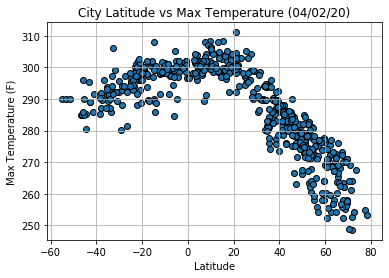

- La grafica nos muestra una relacion entre la latitud y la temperatura maxima
- Podemos ver que entre la latitud -20 y 20 la temperatura maxima se mantiene y empieza a decaer considerablemente
  a partir del grado 20


In [162]:
x = df_wea_all['Lat']
y = df_wea_all['Max Temp']
plt.scatter(x,y,edgecolors='black')
plt.title('City Latitude vs Max Temperature (04/02/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()
print('- La grafica nos muestra una relacion entre la latitud y la temperatura maxima')
print('- Podemos ver que entre la latitud -20 y 20 la temperatura maxima se mantiene y empieza a decaer considerablemente\n  a partir del grado 20')

#### Latitude vs. Humidity Plot

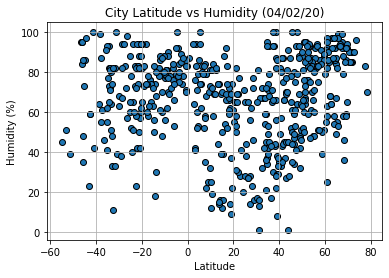

- La grafica nos muestra una relacion entre la latitud y la humedad
- Podemos observar que la mayor parte de las ciudades tiene una humedad arriba de 60 %


In [163]:
x = df_wea_all['Lat']
y = df_wea_all['Humidity']
plt.scatter(x,y,edgecolors='black')
plt.title('City Latitude vs Humidity (04/02/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
print('- La grafica nos muestra una relacion entre la latitud y el porcentaje de humedad')
print('- Podemos observar que la mayor parte de las ciudades tiene una humedad arriba de 60 %')

#### Latitude vs. Cloudiness Plot

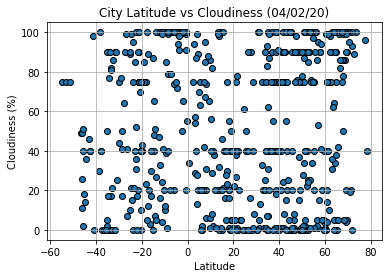

- La grafica nos muestra una relacion entre la latitud y el porcentaje de nubes registrada
- Podemos observar que el porcentaje de nubes en las ciudades esta entre 0 y 40 % asi como 50 y 100 %


In [165]:
x = df_wea_all['Lat']
y = df_wea_all['Cloudiness']
plt.scatter(x,y,edgecolors='black')
plt.title('City Latitude vs Cloudiness (04/02/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
print('- La grafica nos muestra una relacion entre la latitud y el porcentaje de nubes registrada')
print('- Podemos observar que el porcentaje de nubes en las ciudades esta entre 0 y 40 % asi como 50 y 100 %')

#### Latitude vs. Wind Speed Plot

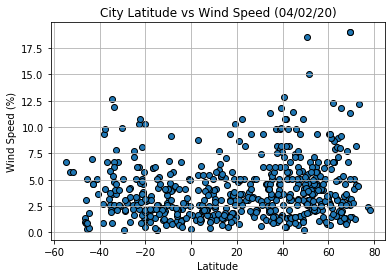

- La grafica nos muestra una relacion entre la latitud y el porcentaje de Velocidad del Viento
- Podemos observar que casi todas las ciudades registran porcentajes de viento por deba de lso 7.5%


In [164]:
x = df_wea_all['Lat']
y = df_wea_all['Wind Speed']
plt.scatter(x,y,edgecolors='black')
plt.title('City Latitude vs Wind Speed (04/02/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid()
plt.show()
print('- La grafica nos muestra una relacion entre la latitud y el porcentaje de Velocidad del Viento')
print('- Podemos observar que casi todas las ciudades registran porcentajes de viento por deba de lso 7.5%')

## Linear Regression

In [76]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regr(x,y,eq_x,eq_y,lab_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(eq_x,eq_y),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(lab_y)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [102]:
# Create Northern and Southern Hemisphere DataFrames
north_df = df_wea_all.loc[df_wea_all['Lat'] > 0]
south_df = df_wea_all.loc[df_wea_all['Lat'] < 0]
display(north_df.head())
display(south_df.head())

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,40.0,US,1.585857e+09,69.0,22.08,-159.32,299.15,2.60
3,San Carlos,86.0,VE,1.585857e+09,32.0,9.66,-68.58,308.50,1.68
5,Jamestown,1.0,US,1.585857e+09,45.0,42.10,-79.24,284.15,5.10
8,Dikson,100.0,RU,1.585858e+09,96.0,73.51,80.55,267.67,12.21
9,Khatanga,100.0,RU,1.585858e+09,90.0,71.97,102.50,263.91,8.20


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Castro,99.0,BR,1.585857e+09,52.0,-24.79,-50.01,295.84,1.69
6,Saint-Philippe,75.0,RE,1.585857e+09,94.0,-21.36,55.77,296.15,3.60
7,Ushuaia,75.0,AR,1.585857e+09,45.0,-54.80,-68.30,290.15,6.70
11,Cassilândia,85.0,BR,1.585858e+09,73.0,-19.11,-51.73,299.56,1.50
13,New Norfolk,40.0,AU,1.585858e+09,59.0,-42.78,147.06,289.15,4.60


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.910006219892972


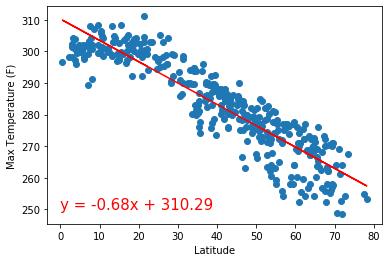

- La pendiente nos dice que por cada grado aumentado en la latitud la temperatura maxima 
  va a disminuir .68 grados en promedio
- La r cuadrada nos dice que hay una fuerte relacion entre las variables


In [141]:
x = north_df['Lat']
y = north_df['Max Temp']
lin_regr(x,y,0,250,'Max Temperature (F)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la temperatura maxima \n  va a disminuir .68 grados en promedio')
print('- La r cuadrada nos dice que hay una fuerte relacion entre las variables')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6474040848836785


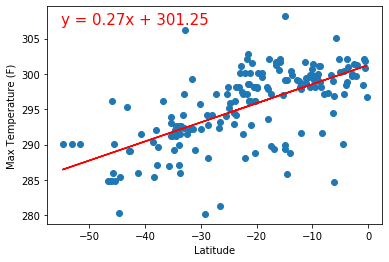

- La pendiente nos dice que por cada grado aumentado en la latitud la temperatura maxima 
  va a aumentar .27 grados en promedio
- La r cuadrada nos dice que hay una gran relacion entre las variables


In [142]:
x = south_df['Lat']
y = south_df['Max Temp']
lin_regr(x,y,-55,307,'Max Temperature (F)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la temperatura maxima \n  va a aumentar .27 grados en promedio')
print('- La r cuadrada nos dice que hay una gran relacion entre las variables')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32714620191711763


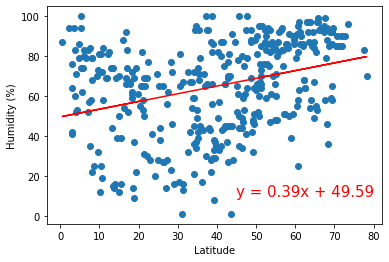

- La pendiente nos dice que por cada grado aumentado en la latitud la humedad 
  va a aumentar .39%
- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable


In [153]:
x = north_df['Lat']
y = north_df['Humidity']
lin_regr(x,y,45,10,'Humidity (%)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la humedad \n  va a aumentar .39%')
print('- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20215883137951146


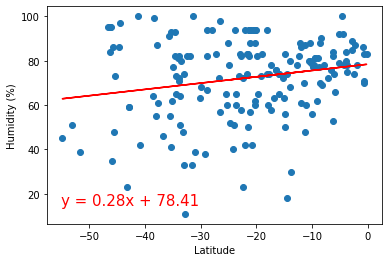

- La pendiente nos dice que por cada grado aumentado en la latitud la humedad 
  va a aumentar .28%
- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable


In [152]:
x = south_df['Lat']
y = south_df['Humidity']
lin_regr(x,y,-55,15,'Humidity (%)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la humedad \n  va a aumentar .28%')
print('- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20870285056968202


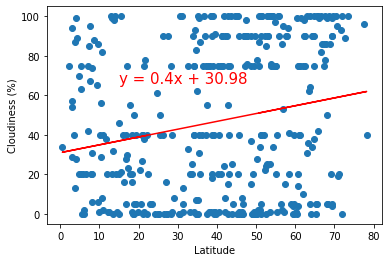

- La pendiente nos dice que por cada grado aumentado en la latitud la cantidad de nubes 
  va a aumentar .4%
- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable


In [151]:
x = north_df['Lat']
y = north_df['Cloudiness']
lin_regr(x,y,15,66,'Cloudiness (%)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la cantidad de nubes \n  va a aumentar .4%')
print('- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31870079062346957


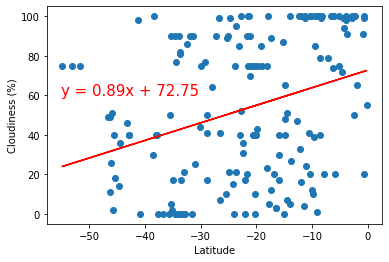

- La pendiente nos dice que por cada grado aumentado en la latitud la cantidad de nubes 
  va a aumentar .89%
- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable


In [154]:
x = south_df['Lat']
y = south_df['Cloudiness']
lin_regr(x,y,-55,60,'Cloudiness (%)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la cantidad de nubes \n  va a aumentar .89%')
print('- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17993412486221297


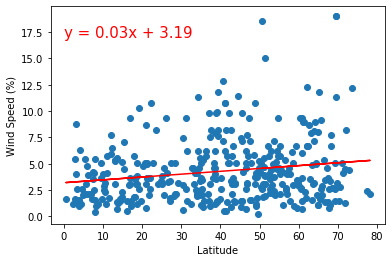

- La pendiente nos dice que por cada grado aumentado en la latitud la velocidad del viento 
  va a aumentar .03%
- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable


In [155]:
x = north_df['Lat']
y = north_df['Wind Speed']
lin_regr(x,y,0,17,'Wind Speed (%)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la velocidad del viento \n  va a aumentar .03%')
print('- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18733430591333203


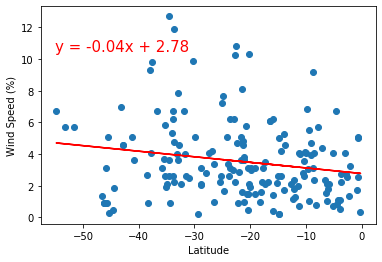

- La pendiente nos dice que por cada grado aumentado en la latitud la velocidad del viento 
  va a disminuir .04%
- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable


In [156]:
x = south_df['Lat']
y = south_df['Wind Speed']
lin_regr(x,y,-55,10.5,'Wind Speed (%)')
print('- La pendiente nos dice que por cada grado aumentado en la latitud la velocidad del viento \n  va a disminuir .04%')
print('- La r cuadrada nos dice que casi no hay relacion entre las variables por lo que es poco confiable')